# Travel Insurance

Туристическому страховому агенству необходимо принимать решения о выплате или невыплате страховой компенсации застрахованному лицу. Принять это решение могут помочь методы машинного обучения. Дана таблица, в которой описаны 63326 случаев страхования туристов агенством из Сингапура. В столбцах датасета представлена следующая информация о страховых случаях:

1. название агенства
2. тип агенства
3. способ поставки полиса туристического страхования
4. название полиса
5. чистая прибыль после продаж полисов
6. продолжительность страхования
7. место путешествия
8. статус выплаты (совершена или нет)
9. комиссия, полученная агентством по страхованию путешествий
10. пол застрахованного лица
11. возраст застрахованного лица

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Чтение данных


In [2]:
data_raw = pd.read_csv('./data_travel_insurance.csv')
data_raw.head(15)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


Удалим из датасеты выбросы и заполним пропущенные значения значением  'NA' (о выбросах и пропущенных значениях шла речь в файле travel_insurance.ipynb)

In [3]:
data_raw.loc[data_raw['Age'] > 100, 'Age'] = np.mean(data_raw["Age"])
data_raw.loc[data_raw["Duration"] < 100, "Duration"] = np.mean(data_raw["Duration"])
rows_to_drop = data_raw[data_raw['Age'] > 100].index
data_raw = data_raw.drop(rows_to_drop)
data_raw['Gender'].fillna('NA', inplace = True)

## Обработка категориальных признаков

Переведем категориальные признаки в числовое представление и бинаризуем, после чего нормализуем их

In [4]:
inp_cat = data_raw[["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination", "Gender"]]
inp_non_cat = data_raw[["Claim", "Duration", "Net Sales", "Commision (in value)", "Age"]]
data_bin = pd.get_dummies(inp_cat)
data_bin = pd.concat([data_bin, inp_non_cat], axis=1)
data_bin['Claim'].replace(to_replace={'No': 0, 'Yes': 1}, inplace=True)  # главный столбец
data_stand = (data_bin - data_bin.min()) / (data_bin.max() - data_bin.min())
data_stand.head(15)

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,...,Destination_ZAMBIA,Destination_ZIMBABWE,Gender_F,Gender_M,Gender_NA,Claim,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.028289,0.300250,0.033757,0.920455
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.028289,0.300250,0.033757,0.806818
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.283153,0.104762,0.363636
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.291410,0.083810,0.363636
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.307923,0.041905,0.465909
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.223520,0.149383,0.500000
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.291410,0.083810,0.363636
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.233611,0.230476,0.329545
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.307923,0.041905,0.500000
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.028289,0.241868,0.209524,0.420455


## Разбиение на обучающую и тестовую выборки

In [5]:
x = np.array(data_stand.drop('Claim', axis=1))
y = np.array(data_stand['Claim'], dtype=int)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train.shape, x_test.shape

((47494, 202), (15832, 202))

## Обучаем классификатор 

In [6]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (100,100),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [7]:
%%time
mlp_model.fit(x_train, y_train)

Wall time: 1.9 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=42, solver='lbfgs')

## Проверим качество классификатора

In [8]:
from sklearn.metrics import accuracy_score

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print("train accuracy ", accuracy_score(y_train, y_train_pred))
print("test accuracy ", accuracy_score(y_test, y_test_pred))

train accuracy  0.9853665726196993
test accuracy  0.9853461344113188


## Построим графики зависимости ошибки от количества нейронов

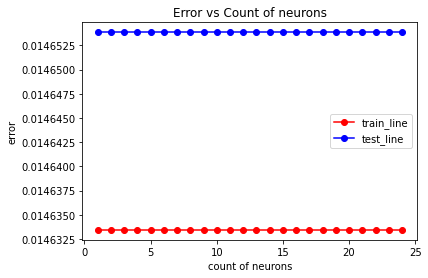

In [9]:
hidden_layer = np.arange(1, 25)

test_err = []
train_err = []

for neurons in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons, ), random_state = 42, max_iter = 1000)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.plot(hidden_layer, train_err, 'r-o', label = 'train_line')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test_line')
plt.title('Error vs Count of neurons')
plt.xlabel('count of neurons')
plt.ylabel('error')
plt.legend()

In [10]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)
neuron_opt = hidden_layer[test_err == min_test_err]
print(neuron_opt)

0.01463342738030067 0.014653865588681153
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


## Построим графики зависимости ошибки от параметра alpha

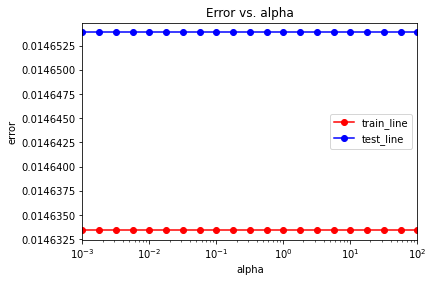

In [11]:
alpha_arr = np.logspace(-3, 2, 21)

test_err = []
train_err = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron_opt[0],), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train_line')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test_line')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Минимальное значение ошибки и оптимальное значение alpha:

In [12]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

0.01463342738030067 0.014653865588681153
[1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00 1.77827941e+00 3.16227766e+00 5.62341325e+00
 1.00000000e+01 1.77827941e+01 3.16227766e+01 5.62341325e+01
 1.00000000e+02]


## Вывод

В результате работы была обучена полносвязная нейронная сеть на задаче классификации страховых случаев. Датасет был разделен на тестовую и обучающую выборки. На данном датасете при вариации количества нейронов и вариации uпараметра альфа наблюдается переобучения, при этом ошибка не зависит от количества нейронов и гиперпараметра alpha. Недообучения не наблюдается